In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import model_selection 
from sklearn.model_selection import train_test_split , learning_curve, validation_curve, GridSearchCV
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
import shap
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
from time import *
import timeit
import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor #Stochastic Gradient Descent
from sklearn.linear_model import Ridge,ElasticNet, Lasso, LassoCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm
from sklearn.svm import SVR





Modèles basiques sans aucune optimisation 
Ajout d’une sélection des variables avec la méthode SelectKBest
Première optimisation de quelques paramètres


In [2]:
data = pd.read_csv('/Users/gauthierrault/Desktop/Projet_4/data_clean.csv')

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Mise en place des fonctions

In [4]:
scores_algo_ener = pd.DataFrame()
times_algo_ener = pd.DataFrame()

In [5]:
def estimateur_ener(algo):
    
    model = algo #model = SGDRegressor( nb_itérations, learning_rate)


    start_time = timeit.default_timer()
    model.fit(X_train, y_train) #model.fit(x, y) : pour entrainer votre modèle.
    fit_time = timeit.default_timer() - start_time
  
    model.score(X_test, y_test) # model.score(x, y) : pour évaluer votre modèle.

    start_time = timeit.default_timer()
    model.predict(X_test) #model.predict(x) : pour générer des prédictions
    predict_time = timeit.default_timer() - start_time
    
    times = fit_time + predict_time
    
    times_algo_ener[algo] = [times]
    
    times_algo_ener.index = ["times"]
    
    print('#'*75)  
    
    print(f'{"":<20}{algo}')
    #print('train score: ', model.score(X_train, y_train))
    #print('test score: ', model.score(X_test, y_test))
    #cv_train_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    #print('train cv_score: ', cv_train_score.mean())
    #cv_test_score = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
    #print('test cv_score: ', cv_test_score.mean())
    print('model score: ',model.score(X_test, y_test))
    ##print(metrics.r2_score(y_test, model.predict(X_test)))
    #print('#'*75)
    #print("Fit time : {:.2f}s".format(fit_time))
    #print("Predict time : {:.2f}s".format(predict_time))  
    #print('#'*75)
    print("Time processing : {:.2f}s".format(times))
    #print('#'*75)
    

In [6]:
def resultat_ener(algo): 
    model = algo
    R2 = round(r2_score(y_test, model.predict(X_test)),2)
    MAE = round(mean_absolute_error(y_test, model.predict(X_test)),2)
    MSE = round(mean_squared_error(y_test, model.predict(X_test)),2)
    RMSE = round(mean_squared_error(y_test, model.predict(X_test), squared=False),2)
    
    #print('#'*75)
    
    print(f'{"R²":<40}{R2}')
    print(f'{"Mean Absolute Error":<40}{MAE}')
    print(f'{"Mean Square Error":<40}{MSE}')
    print(f'{"Root Mean Square Error":<40}{RMSE}')
    
    scores_algo_ener[algo] = [R2,RMSE, MSE, MAE ]
    scores_algo_ener.index = [ "R2", "RMSE", "MSE", "MAE"]

    print('#'*75)

In [7]:
def learning_curve(algo):
    N, train_score, val_score = learning_curve(algo, X, y, train_sizes=np.linspace(0.2,1,5) , cv=5)
    #print(N)
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('train_sizes')
    plt.ylabel('scores')
    plt.legend()
    plt.title(algo)
    plt.show()
    return

In [8]:
def initialisation_ener (algo):
    estimateur_ener(algo)
    resultat_ener(algo)
    #learning_curve(algo)
    return

In [9]:
scores_algo_ener_ess = pd.DataFrame()
times_algo_ener_ess = pd.DataFrame()

In [10]:
def estimateur_ener_ess(algo):
    
    model = algo #model = SGDRegressor( nb_itérations, learning_rate)


    start_time = timeit.default_timer()
    model.fit(X_train, y_train) #model.fit(x, y) : pour entrainer votre modèle.
    fit_time = timeit.default_timer() - start_time
  
    model.score(X_test, y_test) # model.score(x, y) : pour évaluer votre modèle.

    start_time = timeit.default_timer()
    model.predict(X_test) #model.predict(x) : pour générer des prédictions
    predict_time = timeit.default_timer() - start_time
    
    times = fit_time + predict_time
    
    times_algo_ener_ess[algo] = [times]
    
    times_algo_ener_ess.index = ["times"]
    
    print('#'*75)  
    
    print(f'{"":<20}{algo}')
    #print('train score: ', model.score(X_train, y_train))
    #print('test score: ', model.score(X_test, y_test))
    #cv_train_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    #print('train cv_score: ', cv_train_score.mean())
    #cv_test_score = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
    #print('test cv_score: ', cv_test_score.mean())
    print('model score: ',model.score(X_test, y_test))
    #print(metrics.r2_score(y_test, model.predict(X_test)))
    #print('#'*75)
    #print("Fit time : {:.2f}s".format(fit_time))
    #print("Predict time : {:.2f}s".format(predict_time))  
    #print('#'*75)
    print("Time processing : {:.2f}s".format(times))
    #print('#'*75)
    

In [11]:
def resultat_ener_ess(algo): 
    model = algo
    R2 = round(r2_score(y_test, model.predict(X_test)),2)
    MAE = round(mean_absolute_error(y_test, model.predict(X_test)),2)
    MSE = round(mean_squared_error(y_test, model.predict(X_test)),2)
    RMSE = round(mean_squared_error(y_test, model.predict(X_test), squared=False),2)
    
    #print('#'*75)
    
    print(f'{"R²":<40}{R2}')
    print(f'{"Mean Absolute Error":<40}{MAE}')
    print(f'{"Mean Square Error":<40}{MSE}')
    print(f'{"Root Mean Square Error":<40}{RMSE}')
    
    scores_algo_ener_ess[algo] = [R2,RMSE, MSE, MAE ]
    scores_algo_ener_ess.index = [ "R2", "RMSE", "MSE", "MAE"]

    print('#'*75)

In [12]:
def initialisation_ener_ess (algo):
    estimateur_ener_ess(algo)
    resultat_ener_ess(algo)
    #learning_curve(algo)
    return

In [13]:
scores_algo_co2 = pd.DataFrame()
times_algo_co2 = pd.DataFrame()

In [14]:
def estimateur_co2(algo):
    
    model = algo #model = SGDRegressor( nb_itérations, learning_rate)


    start_time = timeit.default_timer()
    model.fit(X_train, y_train) #model.fit(x, y) : pour entrainer votre modèle.
    fit_time = timeit.default_timer() - start_time
  
    model.score(X_test, y_test) # model.score(x, y) : pour évaluer votre modèle.

    start_time = timeit.default_timer()
    model.predict(X_test) #model.predict(x) : pour générer des prédictions
    predict_time = timeit.default_timer() - start_time
    
    times = fit_time + predict_time
    
    times_algo_co2[algo] = [times]
    
    times_algo_co2.index = ["times"]
    
    print('#'*75)  
    
    print(f'{"":<20}{algo}')
    #print('train score: ', model.score(X_train, y_train))
    #print('test score: ', model.score(X_test, y_test))
    #cv_train_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    #print('train cv_score: ', cv_train_score.mean())
    #cv_test_score = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
    #print('test cv_score: ', cv_test_score.mean())
    print('model score: ',model.score(X_test, y_test))
    #print(metrics.r2_score(y_test, model.predict(X_test)))
    #print('#'*75)
    #print("Fit time : {:.2f}s".format(fit_time))
    #print("Predict time : {:.2f}s".format(predict_time))  
    #print('#'*75)
    print("Time processing : {:.2f}s".format(times))
    #print('#'*75)
    

In [15]:
def resultat_co2(algo): 
    model = algo
    R2 = round(r2_score(y_test, model.predict(X_test)),2)
    MAE = round(mean_absolute_error(y_test, model.predict(X_test)),2)
    MSE = round(mean_squared_error(y_test, model.predict(X_test)),2)
    RMSE = round(mean_squared_error(y_test, model.predict(X_test), squared=False),2)
    
    #print('#'*75)
    
    print(f'{"R²":<40}{R2}')
    print(f'{"Mean Absolute Error":<40}{MAE}')
    print(f'{"Mean Square Error":<40}{MSE}')
    print(f'{"Root Mean Square Error":<40}{RMSE}')
    
    scores_algo_co2[algo] = [R2,RMSE, MSE, MAE ]
    scores_algo_co2.index = [ "R2", "RMSE", "MSE", "MAE"]

    print('#'*75)

In [16]:
def initialisation_co2 (algo):
    estimateur_co2(algo)
    resultat_co2(algo)
    #learning_curve(algo)
    return

In [17]:
scores_algo_co2_ess = pd.DataFrame()
times_algo_co2_ess = pd.DataFrame()

In [18]:
def estimateur_co2_ess(algo):
    
    model = algo #model = SGDRegressor( nb_itérations, learning_rate)


    start_time = timeit.default_timer()
    model.fit(X_train, y_train) #model.fit(x, y) : pour entrainer votre modèle.
    fit_time = timeit.default_timer() - start_time
  
    model.score(X_test, y_test) # model.score(x, y) : pour évaluer votre modèle.

    start_time = timeit.default_timer()
    model.predict(X_test) #model.predict(x) : pour générer des prédictions
    predict_time = timeit.default_timer() - start_time
    
    times = fit_time + predict_time
    
    times_algo_co2_ess[algo] = [times]
    
    times_algo_co2_ess.index = ["times"]
    
    print('#'*75)  
    
    print(f'{"":<20}{algo}')
    #print('train score: ', model.score(X_train, y_train))
    #print('test score: ', model.score(X_test, y_test))
    #cv_train_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    #print('train cv_score: ', cv_train_score.mean())
    #cv_test_score = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
    #print('test cv_score: ', cv_test_score.mean())
    print('model score: ',model.score(X_test, y_test))
    #print(metrics.r2_score(y_test, model.predict(X_test)))
    #print('#'*75)
    #print("Fit time : {:.2f}s".format(fit_time))
    #print("Predict time : {:.2f}s".format(predict_time))  
    #print('#'*75)
    print("Time processing : {:.2f}s".format(times))
    #print('#'*75)
    

In [19]:
def resultat_co2_ess(algo): 
    model = algo
    R2 = round(r2_score(y_test, model.predict(X_test)),2)
    MAE = round(mean_absolute_error(y_test, model.predict(X_test)),2)
    MSE = round(mean_squared_error(y_test, model.predict(X_test)),2)
    RMSE = round(mean_squared_error(y_test, model.predict(X_test), squared=False),2)
    
    #print('#'*75)
    
    print(f'{"R²":<40}{R2}')
    print(f'{"Mean Absolute Error":<40}{MAE}')
    print(f'{"Mean Square Error":<40}{MSE}')
    print(f'{"Root Mean Square Error":<40}{RMSE}')
    
    scores_algo_co2_ess[algo] = [R2,RMSE, MSE, MAE ]
    scores_algo_co2_ess.index = [ "R2", "RMSE", "MSE", "MAE"]

    print('#'*75)

In [20]:
def initialisation_co2_ess (algo):
    estimateur_co2_ess(algo)
    resultat_co2_ess(algo)
    #learning_curve(algo)
    return

In [21]:
scores_algo_optim = pd.DataFrame()
times_algo_optim  = pd.DataFrame()

In [22]:
def estimateur_optim(algo):
    
    model = algo #model = SGDRegressor( nb_itérations, learning_rate)


    start_time = timeit.default_timer()
    model.fit(X_train, y_train) #model.fit(x, y) : pour entrainer votre modèle.
    fit_time = timeit.default_timer() - start_time
  
    model.score(X_test, y_test) # model.score(x, y) : pour évaluer votre modèle.

    start_time = timeit.default_timer()
    model.predict(X_test) #model.predict(x) : pour générer des prédictions
    predict_time = timeit.default_timer() - start_time
    
    times = fit_time + predict_time
    
    times_algo_optim[algo] = [times]
    
    times_algo_optim.index = ["times"]
    
    print('#'*75)  
    
    print(f'{"":<20}{algo}')
    #print('train score: ', model.score(X_train, y_train))
    #print('test score: ', model.score(X_test, y_test))
    #cv_train_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    #print('train cv_score: ', cv_train_score.mean())
    #cv_test_score = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
    #print('test cv_score: ', cv_test_score.mean())
    print('model score: ',model.score(X_test, y_test))
    ##print(metrics.r2_score(y_test, model.predict(X_test)))
    #print('#'*75)
    #print("Fit time : {:.2f}s".format(fit_time))
    #print("Predict time : {:.2f}s".format(predict_time))  
    #print('#'*75)
    print("Time processing : {:.2f}s".format(times))
    #print('#'*75)
    

In [23]:
def resultat_optim(algo): 
    model = algo
    R2 = round(r2_score(y_test, model.predict(X_test)),2)
    MAE = round(mean_absolute_error(y_test, model.predict(X_test)),2)
    MSE = round(mean_squared_error(y_test, model.predict(X_test)),2)
    RMSE = round(mean_squared_error(y_test, model.predict(X_test), squared=False),2)
    
    #print('#'*75)
    
    print(f'{"R²":<40}{R2}')
    print(f'{"Mean Absolute Error":<40}{MAE}')
    print(f'{"Mean Square Error":<40}{MSE}')
    print(f'{"Root Mean Square Error":<40}{RMSE}')
    
    scores_algo_optim[algo] = [R2,RMSE, MSE, MAE ]
    scores_algo_optim.index = [ "R2", "RMSE", "MSE", "MAE"]

    print('#'*75)

In [24]:
def optim (algo):
    estimateur_optim(algo)
    resultat_optim(algo)
    #learning_curve(algo)
    return

In [25]:
def feat_selec_score (selector):
    R2 = round(r2_score(y_test, selector.predict(X_test)),2)
    MAE = round(mean_absolute_error(y_test, selector.predict(X_test)),2)
    MSE = round(mean_squared_error(y_test, selector.predict(X_test)),2)
    RMSE = round(mean_squared_error(y_test, selector.predict(X_test), squared=False),2)
    
    #print('#'*75)
    
    print(f'{"R²":<40}{R2}')
    print(f'{"Mean Absolute Error":<40}{MAE}')
    print(f'{"Mean Square Error":<40}{MSE}')
    print(f'{"Root Mean Square Error":<40}{RMSE}')

# Mise en place du jeu d'entrainement et de test pour SiteEnergyUse(kBtu)

In [26]:
X = data.drop(['SiteEnergyUse(kBtu)'],axis=1) #TotalGHGEmissions
y = data['SiteEnergyUse(kBtu)']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

print('train set: ',X_train.shape, y_train.shape)
print('test set: ', X_test.shape, y_test.shape)

train set:  (2548, 584) (2548,)
test set:  (638, 584) (638,)


## StratifiedKFold

nb_cut = 5

cut = pd.qcut(y_train, nb_cut)
cut_ranges = cut.unique().sort_values()
cut_ranges

score = []

for rank in cut:
    for i, ranges in enumerate(cut_ranges):
        if rank == ranges:
            score.append(i+1)

y_train_rank = score

from sklearn.model_selection import StratifiedKFold

stratified_folds = list(StratifiedKFold(n_splits=5, shuffle=True).split(X_train, y_train_rank))

# Lancement des algorithmes

In [28]:
initialisation_ener(DummyRegressor())
initialisation_ener(linear_model.Lasso())
initialisation_ener(Ridge())
initialisation_ener(ElasticNet())
initialisation_ener(KernelRidge())
initialisation_ener(SVR())

###########################################################################
                    DummyRegressor()
model score:  -0.0014419102464506839
Time processing : 0.00s
R²                                      -0.0
Mean Absolute Error                     0.58
Mean Square Error                       0.84
Root Mean Square Error                  0.92
###########################################################################
###########################################################################
                    Lasso()
model score:  -0.0014419102464506839
Time processing : 0.02s
R²                                      -0.0
Mean Absolute Error                     0.58
Mean Square Error                       0.84
Root Mean Square Error                  0.92
###########################################################################
###########################################################################
                    Ridge()
model score:  0.9276739104826748
Time process

In [29]:
result_ener = pd.concat([scores_algo_ener, times_algo_ener])
result_ener.T.sort_values(by="R2",ascending=False)

,R2,RMSE,MSE,MAE,times
Ridge(),0.93,0.25,0.06,0.13,0.036880
KernelRidge(),0.92,0.25,0.06,0.13,0.229496
SVR(),0.68,0.52,0.27,0.21,0.652264
ElasticNet(),0.42,0.70,0.49,0.43,0.011288
DummyRegressor(),-0.00,0.92,0.84,0.58,0.000484
Lasso(),-0.00,0.92,0.84,0.58,0.017495


model selectionné Ridge, KRR 

# Selection des features au travers de RFECV

In [30]:
RFECV_ridge = RFECV(Ridge(random_state=0), scoring='r2', step=1, min_features_to_select=2, cv=5)
RFECV_ridge.fit(X_train, y_train)

RFECV(cv=5, estimator=Ridge(random_state=0), min_features_to_select=2,
      scoring='r2')

In [31]:
feat_selec_score(RFECV_ridge)

R²                                      0.93
Mean Absolute Error                     0.13
Mean Square Error                       0.06
Root Mean Square Error                  0.24


RFECV n'a pas un impact positif 

Feature importance globale avec Ridge

In [32]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

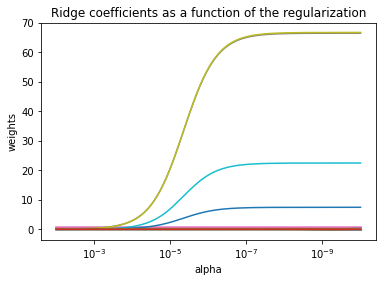

In [33]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

# Visualisation des features importances au travers de Shap

In [34]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [35]:
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

In [36]:
shap_values = explainer.shap_values(X_test)

In [37]:
X_test_array = np.array(X_test)

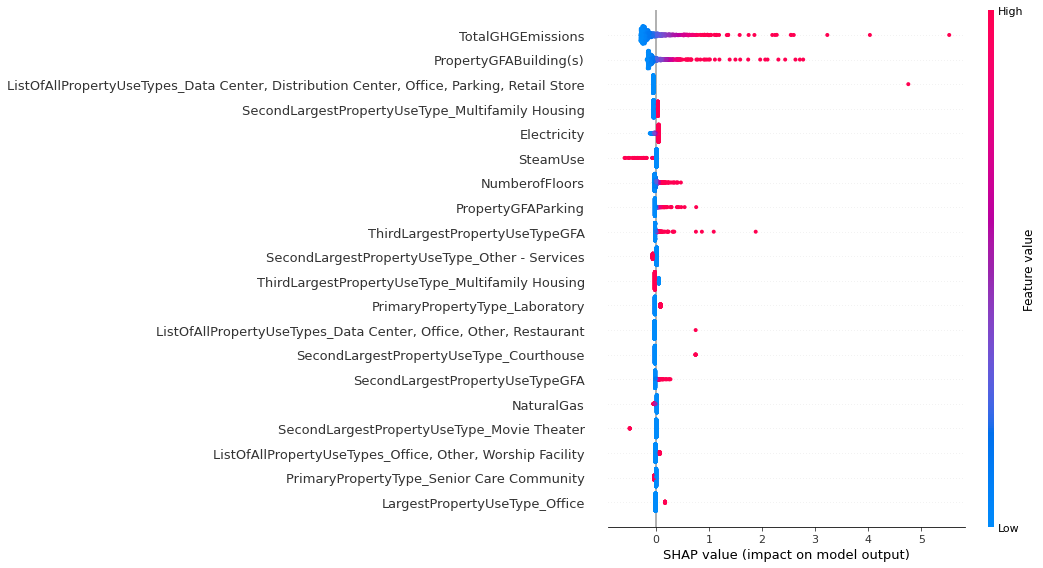

In [38]:
shap.summary_plot(shap_values, X_test_array, feature_names=data.columns)

In [39]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

In [40]:
shap_values = explainer(X)

shap.plots.bar(shap_values)

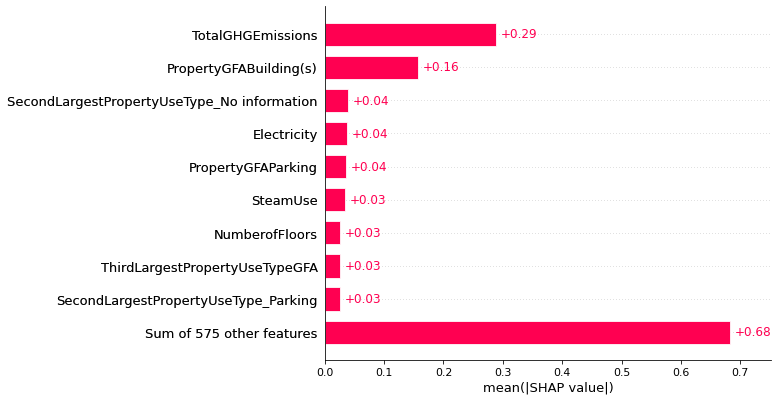

In [41]:
shap.plots.bar(shap_values, max_display=10)

# Optimisation des hyperparamètres

In [42]:
# Parameters optimization
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
solver = ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
param_grid = {'alpha': alphas,
             "solver": solver}


score = 'r2'

# Grid search
optimized_ridge = model_selection.GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring=score
)

optimized_ridge.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters on training set :")
print(optimized_ridge.best_params_)
print("Best R² score on training set : {:.3f}".format(optimized_ridge.best_score_))

Best parameters on training set :
{'alpha': 46.41588833612782, 'solver': 'sparse_cg'}
Best R² score on training set : 0.900


In [43]:
Ridge_optim = Ridge()

In [44]:
Ridge_optim.set_params(**optimized_ridge.best_params_)

Ridge(alpha=46.41588833612782, solver='sparse_cg')

In [45]:
Ridge_optim = Ridge_optim.set_params(**optimized_ridge.best_params_)

In [46]:
optim(Ridge_optim)

###########################################################################
                    Ridge(alpha=46.41588833612782, solver='sparse_cg')
model score:  0.9293445240170289
Time processing : 0.04s
R²                                      0.93
Mean Absolute Error                     0.13
Mean Square Error                       0.06
Root Mean Square Error                  0.24
###########################################################################


In [47]:
# Parameters optimization
#kernels = ['additive_chi2', 'chi2', 'linear', 'polynomial', 'poly', 'rbf', 'laplacian', 'sigmoid', 'cosine']
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)

n_gammas = 10
gammas = np.logspace(-2, 1, n_gammas)

kernels = ['linear', 'rbf' ]

param_grid = {'alpha': alphas, 
              'gamma': gammas,
              'kernel' : kernels}

score = 'r2'

# Grid search
optimized_k_ridge = model_selection.GridSearchCV(
    KernelRidge(),
    param_grid,
    cv=5,
    scoring=score
)

optimized_k_ridge.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters on training set :")
print(optimized_k_ridge.best_params_)
print("Best R² score on training set : {:.3f}".format(optimized_k_ridge.best_score_))

Best parameters on training set :
{'alpha': 46.41588833612782, 'gamma': 0.01, 'kernel': 'linear'}
Best R² score on training set : 0.900


In [48]:
KRidge_optim = KernelRidge()

In [49]:
KRidge_optim.set_params(**optimized_k_ridge.best_params_)

KernelRidge(alpha=46.41588833612782, gamma=0.01)

In [50]:
KRidge_optim = KRidge_optim.set_params(**optimized_k_ridge.best_params_)

In [51]:
optim(KRidge_optim)

###########################################################################
                    KernelRidge(alpha=46.41588833612782, gamma=0.01)
model score:  0.9289312384298893
Time processing : 0.24s
R²                                      0.93
Mean Absolute Error                     0.13
Mean Square Error                       0.06
Root Mean Square Error                  0.24
###########################################################################


In [52]:
result_optim = pd.concat([scores_algo_optim, times_algo_optim])
result_optim.T.sort_values(by="R2",ascending=False)

,R2,RMSE,MSE,MAE,times
"Ridge(alpha=46.41588833612782, solver='sparse_cg')",0.93,0.24,0.06,0.13,0.036042
"KernelRidge(alpha=46.41588833612782, gamma=0.01)",0.93,0.24,0.06,0.13,0.237860


# Rechargement du dataset pour récupérer TotalGHGEmissions

In [53]:
data = pd.read_csv('/Users/gauthierrault/Desktop/Projet_4/data_clean.csv')

In [54]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [55]:
X = data.drop(['TotalGHGEmissions'],axis=1) 
y = data['TotalGHGEmissions']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

print('train set: ',X_train.shape, y_train.shape)
print('test set: ', X_test.shape, y_test.shape)

train set:  (2548, 584) (2548,)
test set:  (638, 584) (638,)


In [57]:
initialisation_co2(DummyRegressor())
initialisation_co2(linear_model.Lasso())
initialisation_co2(Ridge())
initialisation_co2(ElasticNet())
initialisation_co2(KernelRidge())
initialisation_co2(SVR())

###########################################################################
                    DummyRegressor()
model score:  -0.004496361918153946
Time processing : 0.00s
R²                                      -0.0
Mean Absolute Error                     0.52
Mean Square Error                       0.76
Root Mean Square Error                  0.87
###########################################################################
###########################################################################
                    Lasso()
model score:  -0.004496361918153946
Time processing : 0.01s
R²                                      -0.0
Mean Absolute Error                     0.52
Mean Square Error                       0.76
Root Mean Square Error                  0.87
###########################################################################
###########################################################################
                    Ridge()
model score:  0.8495805627899586
Time processin

In [58]:
result_co2 = pd.concat([scores_algo_co2, times_algo_co2])
result_co2.T.sort_values(by="R2",ascending=False)

,R2,RMSE,MSE,MAE,times
Ridge(),0.85,0.34,0.11,0.17,0.034958
KernelRidge(),0.85,0.34,0.11,0.18,0.239662
SVR(),0.58,0.56,0.32,0.22,0.781316
ElasticNet(),0.33,0.71,0.51,0.41,0.011066
DummyRegressor(),-0.00,0.87,0.76,0.52,0.000379
Lasso(),-0.00,0.87,0.76,0.52,0.013355


In [59]:
RFECV_ridge = RFECV(Ridge(random_state=0), scoring='r2', step=1, min_features_to_select=2, cv=5)
RFECV_ridge.fit(X_train, y_train)

RFECV(cv=5, estimator=Ridge(random_state=0), min_features_to_select=2,
      scoring='r2')

In [60]:
feat_selec_score(RFECV_ridge)

R²                                      0.87
Mean Absolute Error                     0.17
Mean Square Error                       0.1
Root Mean Square Error                  0.32


RFECV a un intérêt faible pour l'algorithme Rigde pour les prédictions de TotalGHGEmissions

# Optimisation des hyperparamètres

In [61]:
# Parameters optimization
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
solver = ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
param_grid = {'alpha': alphas,
             "solver": solver}


score = 'r2'

# Grid search
optimized_ridge = model_selection.GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring=score
)

optimized_ridge.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters on training set :")
print(optimized_ridge.best_params_)
print("Best R² score on training set : {:.3f}".format(optimized_ridge.best_score_))

Best parameters on training set :
{'alpha': 46.41588833612782, 'solver': 'lsqr'}
Best R² score on training set : 0.818


In [62]:
Ridge_optim = Ridge()

In [63]:
Ridge_optim.set_params(**optimized_ridge.best_params_)

Ridge(alpha=46.41588833612782, solver='lsqr')

In [64]:
Ridge_optim = Ridge_optim.set_params(**optimized_ridge.best_params_)

In [65]:
optim(Ridge_optim)

###########################################################################
                    Ridge(alpha=46.41588833612782, solver='lsqr')
model score:  0.8738982673239252
Time processing : 0.03s
R²                                      0.87
Mean Absolute Error                     0.16
Mean Square Error                       0.1
Root Mean Square Error                  0.31
###########################################################################


# Visualisation des features importances au travers de Shap

In [66]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [67]:
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

In [68]:
shap_values = explainer.shap_values(X_test)

In [69]:
X_test_array = np.array(X_test)

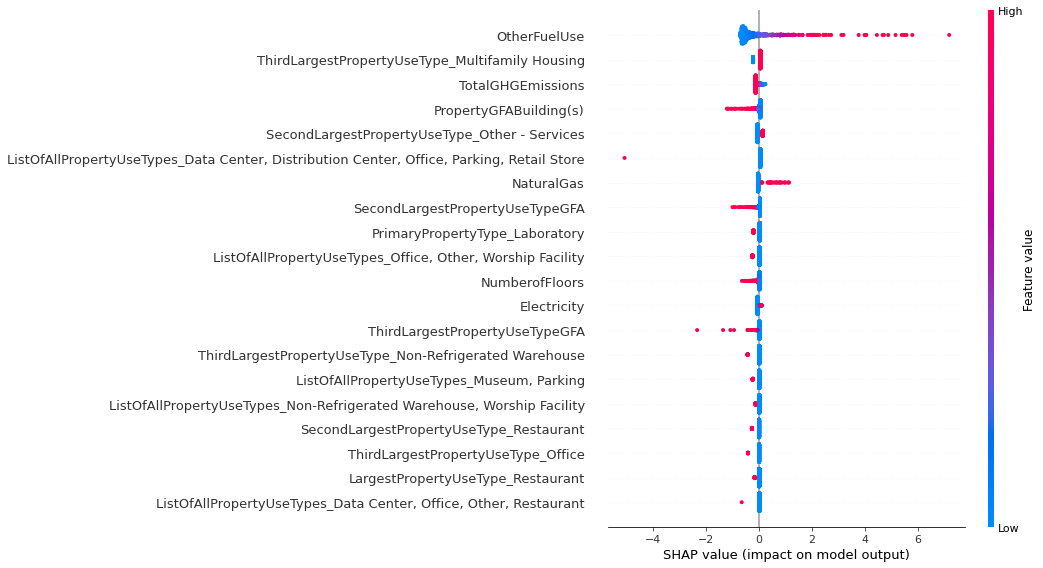

In [70]:
shap.summary_plot(shap_values, X_test_array, feature_names=data.columns)

In [71]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

In [72]:
shap_values = explainer(X)

shap.plots.bar(shap_values)

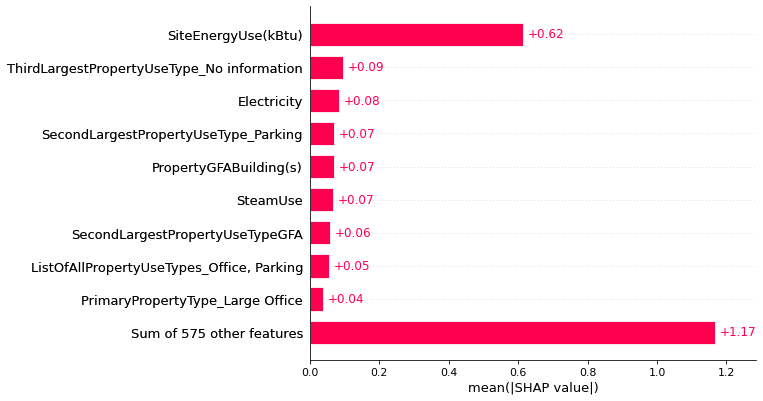

In [73]:
shap.plots.bar(shap_values, max_display=10)

# Rechargement du dataset pour récupérer EnergyStarScore 

Prédiction pour SiteEnergyUse(kBtu) avec EnergyStarScore 

In [74]:
df_energy = pd.read_csv('/Users/gauthierrault/Desktop/Projet_4/df_energy.csv')

In [75]:
df_energy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [76]:
df_energy = df_energy.dropna()

In [77]:
df_energy = df_energy.reset_index(drop=True)

In [78]:
X = df_energy.drop(['SiteEnergyUse(kBtu)'],axis=1) #TotalGHGEmissions
y = df_energy['SiteEnergyUse(kBtu)']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

print('train set: ',X_train.shape, y_train.shape)
print('test set: ', X_test.shape, y_test.shape)

train set:  (1708, 585) (1708,)
test set:  (428, 585) (428,)


In [80]:
initialisation_ener_ess(DummyRegressor())
initialisation_ener_ess(linear_model.Lasso())
initialisation_ener_ess(Ridge())
initialisation_ener_ess(ElasticNet())
initialisation_ener_ess(KernelRidge())
initialisation_ener_ess(SVR())

###########################################################################
                    DummyRegressor()
model score:  -0.00041762625877383996
Time processing : 0.00s
R²                                      -0.0
Mean Absolute Error                     0.57
Mean Square Error                       0.8
Root Mean Square Error                  0.89
###########################################################################
###########################################################################
                    Lasso()
model score:  -0.00041762625877383996
Time processing : 0.01s
R²                                      -0.0
Mean Absolute Error                     0.57
Mean Square Error                       0.8
Root Mean Square Error                  0.89
###########################################################################
###########################################################################
                    Ridge()
model score:  0.9153472512321479
Time process

In [81]:
#frames = [scores_algo_optim, times_algo_optim]

result_ener_ess = pd.concat([scores_algo_ener_ess, times_algo_ener_ess])
result_ener_ess.T.sort_values(by="R2",ascending=False)

,R2,RMSE,MSE,MAE,times
Ridge(),0.92,0.26,0.07,0.13,0.025871
KernelRidge(),0.92,0.26,0.07,0.13,0.103159
SVR(),0.65,0.53,0.28,0.21,0.308801
ElasticNet(),0.41,0.69,0.47,0.43,0.014437
DummyRegressor(),-0.00,0.89,0.80,0.57,0.000444
Lasso(),-0.00,0.89,0.80,0.57,0.011341


In [82]:
RFECV_ridge = RFECV(Ridge(random_state=0), scoring='r2', step=1, min_features_to_select=2, cv=5)
RFECV_ridge.fit(X_train, y_train)

RFECV(cv=5, estimator=Ridge(random_state=0), min_features_to_select=2,
      scoring='r2')

In [83]:
feat_selec_score(RFECV_ridge)

R²                                      0.92
Mean Absolute Error                     0.13
Mean Square Error                       0.06
Root Mean Square Error                  0.25


Feature importance globale avec Ridge

In [89]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

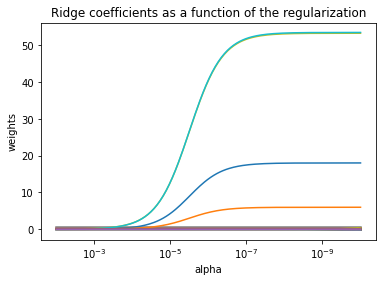

In [90]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

# Feature importance avec SHAP

In [91]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [92]:
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

In [93]:
shap_values = explainer.shap_values(X_test)

In [94]:
X_test_array = np.array(X_test)

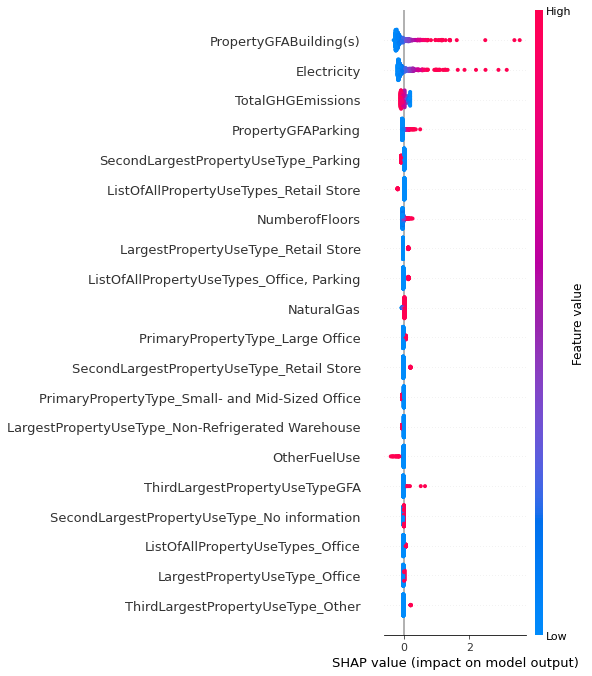

In [95]:
shap.summary_plot(shap_values, X_test_array, feature_names=data.columns)

In [96]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

In [97]:
shap_values = explainer(X)

shap.plots.bar(shap_values)

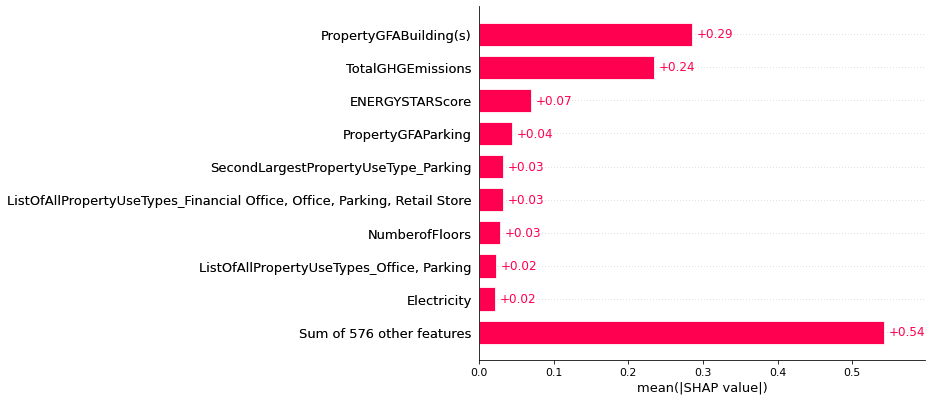

In [98]:
shap.plots.bar(shap_values, max_display=10)

In [99]:
# Parameters optimization
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
solver = ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
param_grid = {'alpha': alphas,
             "solver": solver}


score = 'r2'

# Grid search
optimized_ridge = model_selection.GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring=score
)

optimized_ridge.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters on training set :")
print(optimized_ridge.best_params_)
print("Best R² score on training set : {:.3f}".format(optimized_ridge.best_score_))

Best parameters on training set :
{'alpha': 3.593813663804626, 'solver': 'sag'}
Best R² score on training set : 0.923


In [100]:
Ridge_optim = Ridge()

In [101]:
Ridge_optim.set_params(**optimized_ridge.best_params_)

Ridge(alpha=3.593813663804626, solver='sag')

In [102]:
Ridge_optim = Ridge_optim.set_params(**optimized_ridge.best_params_)

In [103]:
optim(Ridge_optim)

###########################################################################
                    Ridge(alpha=3.593813663804626, solver='sag')
model score:  0.9268212052419802
Time processing : 0.41s
R²                                      0.93
Mean Absolute Error                     0.13
Mean Square Error                       0.06
Root Mean Square Error                  0.24
###########################################################################


In [104]:
# Parameters optimization
#kernels = ['additive_chi2', 'chi2', 'linear', 'polynomial', 'poly', 'rbf', 'laplacian', 'sigmoid', 'cosine']
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)

n_gammas = 10
gammas = np.logspace(-2, 1, n_gammas)

kernels = ['linear', 'rbf' ]

param_grid = {'alpha': alphas, 
              'gamma': gammas,
              'kernel' : kernels}

score = 'r2'

# Grid search
optimized_k_ridge = model_selection.GridSearchCV(
    KernelRidge(),
    param_grid,
    cv=5,
    scoring=score
)

optimized_k_ridge.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters on training set :")
print(optimized_k_ridge.best_params_)
print("Best R² score on training set : {:.3f}".format(optimized_k_ridge.best_score_))

Best parameters on training set :
{'alpha': 46.41588833612782, 'gamma': 0.01, 'kernel': 'linear'}
Best R² score on training set : 0.921


In [105]:
KRidge_optim = KernelRidge()

In [106]:
KRidge_optim.set_params(**optimized_k_ridge.best_params_)

KernelRidge(alpha=46.41588833612782, gamma=0.01)

In [107]:
KRidge_optim = KRidge_optim.set_params(**optimized_k_ridge.best_params_)

In [108]:
optim(KRidge_optim)

###########################################################################
                    KernelRidge(alpha=46.41588833612782, gamma=0.01)
model score:  0.9246559733729378
Time processing : 0.12s
R²                                      0.92
Mean Absolute Error                     0.13
Mean Square Error                       0.06
Root Mean Square Error                  0.25
###########################################################################


In [109]:
result_optim = pd.concat([scores_algo_optim, times_algo_optim])
result_optim.T.sort_values(by="R2",ascending=False)

,R2,RMSE,MSE,MAE,times
"Ridge(alpha=46.41588833612782, solver='sparse_cg')",0.93,0.24,0.06,0.13,0.036042
"KernelRidge(alpha=46.41588833612782, gamma=0.01)",0.93,0.24,0.06,0.13,0.237860
"Ridge(alpha=1e-05, solver='sag')",0.93,0.24,0.06,0.13,0.410897
"Ridge(alpha=3.593813663804626, solver='sag')",0.93,0.24,0.06,0.13,0.412446
"KernelRidge(alpha=46.41588833612782, gamma=0.01)",0.92,0.25,0.06,0.13,0.116657
"Ridge(alpha=46.41588833612782, solver='lsqr')",0.87,0.31,0.10,0.16,0.031403


# Prédiction pour TotalGHGEmissions avec EnergyStarScore 

In [110]:
df_energy = pd.read_csv('/Users/gauthierrault/Desktop/Projet_4/df_energy.csv')

In [111]:
df_energy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [112]:
df_energy = df_energy.dropna()

In [113]:
df_energy = df_energy.reset_index(drop=True)

In [114]:
X = df_energy.drop(['TotalGHGEmissions'],axis=1) #TotalGHGEmissions
y = df_energy['TotalGHGEmissions']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

print('train set: ',X_train.shape, y_train.shape)
print('test set: ', X_test.shape, y_test.shape)

train set:  (1708, 585) (1708,)
test set:  (428, 585) (428,)


In [116]:
initialisation_co2_ess(DummyRegressor())
initialisation_co2_ess(linear_model.Lasso())
initialisation_co2_ess(Ridge())
initialisation_co2_ess(ElasticNet())
initialisation_co2_ess(KernelRidge())
initialisation_co2_ess(SVR())

###########################################################################
                    DummyRegressor()
model score:  -9.042176144191671e-05
Time processing : 0.00s
R²                                      -0.0
Mean Absolute Error                     0.48
Mean Square Error                       0.65
Root Mean Square Error                  0.81
###########################################################################
###########################################################################
                    Lasso()
model score:  -9.042176144191671e-05
Time processing : 0.01s
R²                                      -0.0
Mean Absolute Error                     0.48
Mean Square Error                       0.65
Root Mean Square Error                  0.81
###########################################################################
###########################################################################
                    Ridge()
model score:  0.8119861204717915
Time process

In [117]:
#frames = [scores_algo_optim, times_algo_optim]

result_co2_ess = pd.concat([scores_algo_co2_ess, times_algo_co2_ess])
result_co2_ess.T.sort_values(by="R2",ascending=False)

,R2,RMSE,MSE,MAE,times
Ridge(),0.81,0.35,0.12,0.19,0.024635
KernelRidge(),0.81,0.35,0.12,0.19,0.094783
SVR(),0.54,0.55,0.30,0.22,0.356231
ElasticNet(),0.25,0.70,0.49,0.40,0.010795
DummyRegressor(),-0.00,0.81,0.65,0.48,0.000400
Lasso(),-0.00,0.81,0.65,0.48,0.010781


In [118]:
RFECV_ridge = RFECV(Ridge(random_state=0), scoring='r2', step=1, min_features_to_select=2, cv=5)
RFECV_ridge.fit(X_train, y_train)

RFECV(cv=5, estimator=Ridge(random_state=0), min_features_to_select=2,
      scoring='r2')

In [119]:
feat_selec_score(RFECV_ridge)

R²                                      0.82
Mean Absolute Error                     0.18
Mean Square Error                       0.12
Root Mean Square Error                  0.34


RFECV n'a pas d'intérêt à cette étape

Feature importance globale avec Ridge

In [120]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

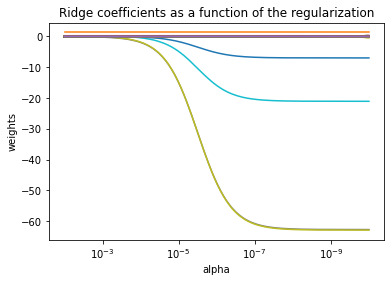

In [121]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [122]:
# Parameters optimization
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
solver = ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
param_grid = {'alpha': alphas,
             "solver": solver}


score = 'r2'

# Grid search
optimized_ridge = model_selection.GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring=score
)

optimized_ridge.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters on training set :")
print(optimized_ridge.best_params_)
print("Best R² score on training set : {:.3f}".format(optimized_ridge.best_score_))

Best parameters on training set :
{'alpha': 3.593813663804626, 'solver': 'saga'}
Best R² score on training set : 0.785


In [123]:
Ridge_optim = Ridge()

In [124]:
Ridge_optim.set_params(**optimized_ridge.best_params_)

Ridge(alpha=3.593813663804626, solver='saga')

In [125]:
Ridge_optim = Ridge_optim.set_params(**optimized_ridge.best_params_)

In [126]:
optim(Ridge_optim)

###########################################################################
                    Ridge(alpha=3.593813663804626, solver='saga')
model score:  0.8595799106449789
Time processing : 1.36s
R²                                      0.86
Mean Absolute Error                     0.17
Mean Square Error                       0.09
Root Mean Square Error                  0.3
###########################################################################


In [127]:
# Parameters optimization
#kernels = ['additive_chi2', 'chi2', 'linear', 'polynomial', 'poly', 'rbf', 'laplacian', 'sigmoid', 'cosine']
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)

n_gammas = 10
gammas = np.logspace(-2, 1, n_gammas)

kernels = ['linear', 'rbf' ]

param_grid = {'alpha': alphas, 
              'gamma': gammas,
              'kernel' : kernels}

score = 'r2'

# Grid search
optimized_k_ridge = model_selection.GridSearchCV(
    KernelRidge(),
    param_grid,
    cv=5,
    scoring=score
)

optimized_k_ridge.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters on training set :")
print(optimized_k_ridge.best_params_)
print("Best R² score on training set : {:.3f}".format(optimized_k_ridge.best_score_))

Best parameters on training set :
{'alpha': 46.41588833612782, 'gamma': 0.01, 'kernel': 'linear'}
Best R² score on training set : 0.782


In [128]:
KRidge_optim = KernelRidge()

In [129]:
KRidge_optim.set_params(**optimized_k_ridge.best_params_)

KernelRidge(alpha=46.41588833612782, gamma=0.01)

In [130]:
KRidge_optim = KRidge_optim.set_params(**optimized_k_ridge.best_params_)

In [131]:
optim(KRidge_optim)

###########################################################################
                    KernelRidge(alpha=46.41588833612782, gamma=0.01)
model score:  0.8557218490088117
Time processing : 0.10s
R²                                      0.86
Mean Absolute Error                     0.17
Mean Square Error                       0.09
Root Mean Square Error                  0.31
###########################################################################


In [132]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [133]:
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

In [134]:
shap_values = explainer.shap_values(X_test)

In [135]:
X_test_array = np.array(X_test)

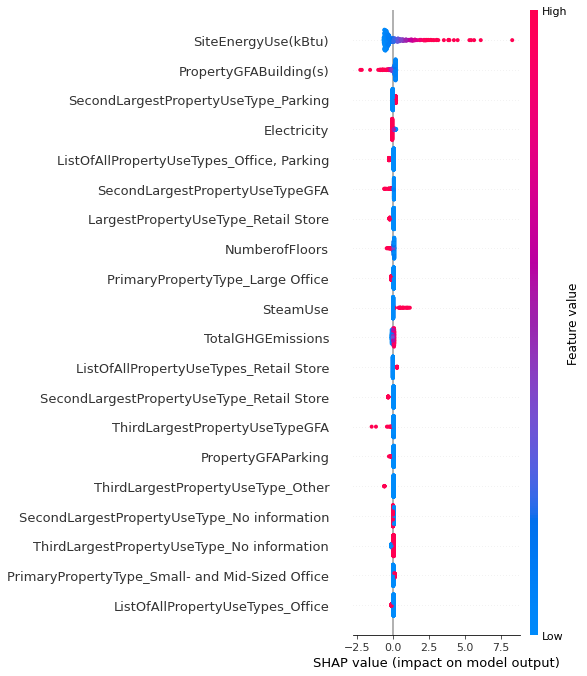

In [136]:
shap.summary_plot(shap_values, X_test_array, feature_names=data.columns)

In [137]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

In [138]:
shap_values = explainer(X)

shap.plots.bar(shap_values)

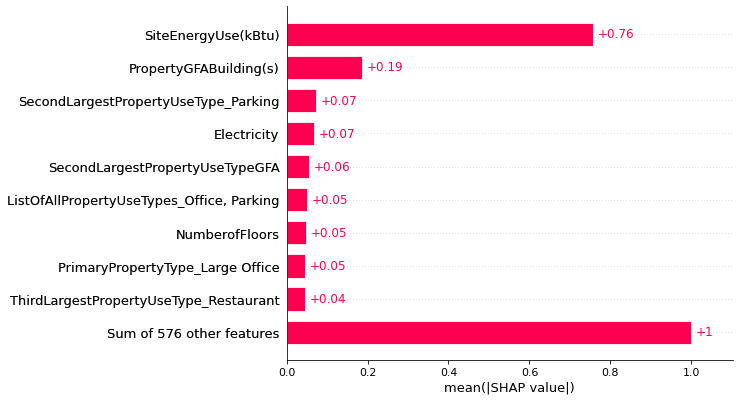

In [139]:
shap.plots.bar(shap_values, max_display=10)

Feature importance globale avec Ridge

In [140]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

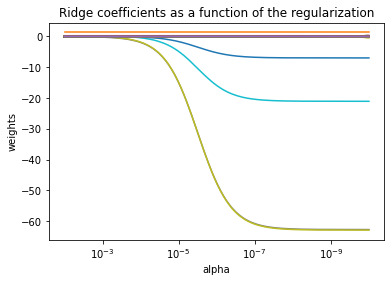

In [141]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()